In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [3]:
flight = pd.DataFrame({
                'Num_flights': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
                 'Avg_fare': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})

In [4]:
flight.head()

,Num_flights,Avg_fare
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [6]:
#kmeans > create an instance
km = KMeans(n_clusters=3)
km.fit(flight)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [7]:
clusters = km.predict(flight)

In [8]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [9]:
#centroids
km.cluster_centers_ #x,y val for each cluster

array([[23.42857143, 44.57142857],
       [62.33333333, 15.83333333],
       [50.        , 63.16666667]])

In [10]:
centroids = km.cluster_centers_

In [11]:
centroids

array([[23.42857143, 44.57142857],
       [62.33333333, 15.83333333],
       [50.        , 63.16666667]])

In [12]:
km.inertia_

1624.4285714285716

In [13]:
#plot the graph
import matplotlib.pyplot as plt

In [14]:
colors=['r','b','g']

In [17]:
color = list(map(lambda x: colors[x], clusters))

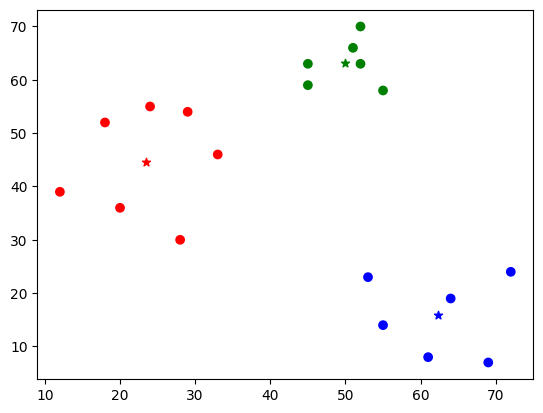

In [20]:
plt.scatter(flight['Num_flights'], flight['Avg_fare'], color = color)
for ind,cent in enumerate(centroids):
    plt.scatter(cent[0], cent[1], color = colors[ind], marker = '*')

In [21]:
inertias = []
for i in np.arange(1,11):
    km = KMeans(n_clusters=i)
    km.fit(flight)
    inertias.append(km.inertia_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

In [22]:
inertias

[13654.210526315786,
 5022.628205128205,
 1624.4285714285716,
 1081.75,
 850.9166666666666,
 647.0833333333334,
 537.6666666666667,
 401.3333333333333,
 351.3333333333333,
 262.75]

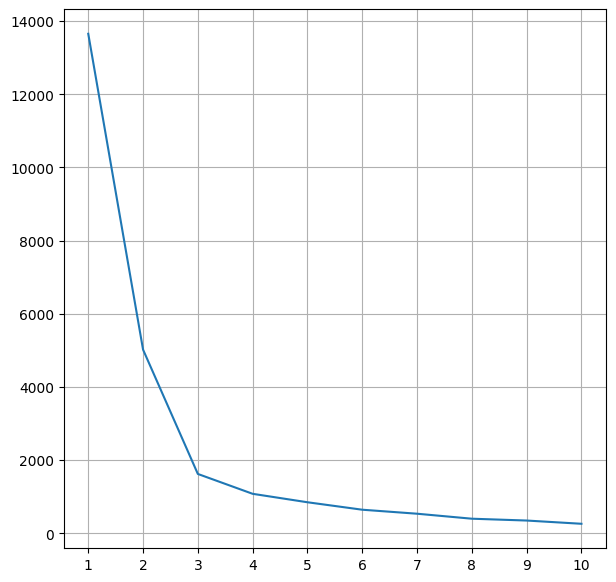

In [23]:
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,11),inertias)
plt.xticks(np.arange(1,11))
plt.grid(True)
plt.show()